# KNN

In [2]:
# KNN function

import math
import operator 

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances.append((trainingSet.iloc[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet.iloc[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0
  
def knn(X_tr, X_te):
  k = [1,3,5,7,9,11,13]
  for i in range (len(k)):
    predictions=[]
    for x in range(len(X_te)):
        neighbors = getNeighbors(X_tr, X_te.iloc[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(X_te.iloc[x][-1]))
    accuracy = getAccuracy(X_te, predictions)
    print('accuracy of k = ', k[i], " is ", accuracy)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

### Mystery data

In [25]:
mystery_data = pd.read_csv('/mystery.csv')

In [26]:
mystery_data.head()

,feature 1,feature 2,class
0,-0.432565,0.635274,Yes
1,-1.665584,-0.601412,Yes
2,0.125332,0.551185,Yes
3,0.287676,-1.099840,Yes
4,-1.146471,0.085991,Yes


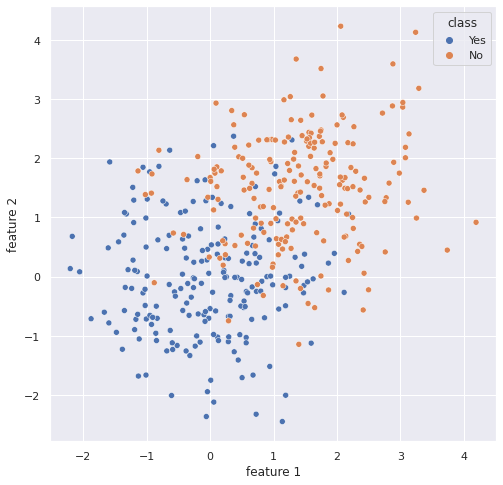

In [27]:
sns.set(rc={'figure.figsize' : (8,8)})
sns.scatterplot(x= mystery_data['feature 1'], y=mystery_data['feature 2'], hue= mystery_data['class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


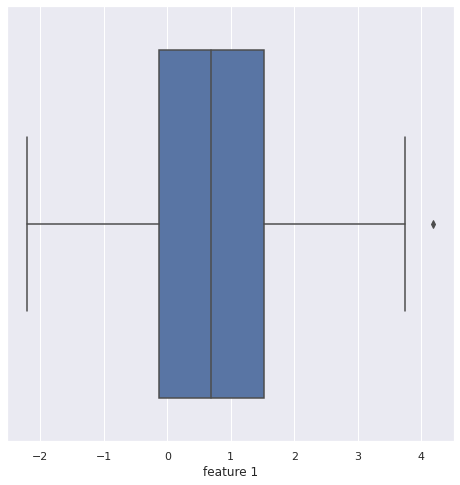

In [28]:
sns.boxplot(mystery_data['feature 1'])

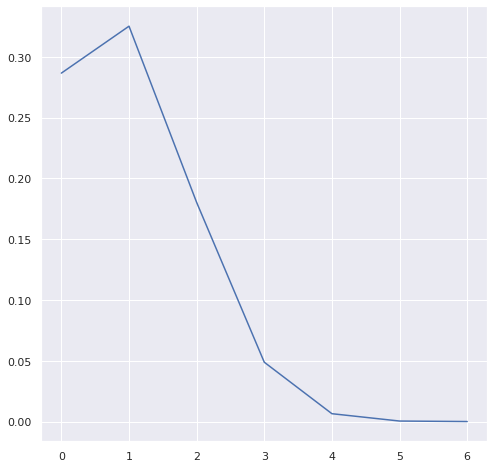

In [29]:
from scipy.stats import norm

rng = np.arange(mystery_data['feature 1'].max() - mystery_data['feature 1'].min())
plt.plot(rng, norm.pdf(rng, mystery_data['feature 1'].mean(), mystery_data['feature 1'].std()))

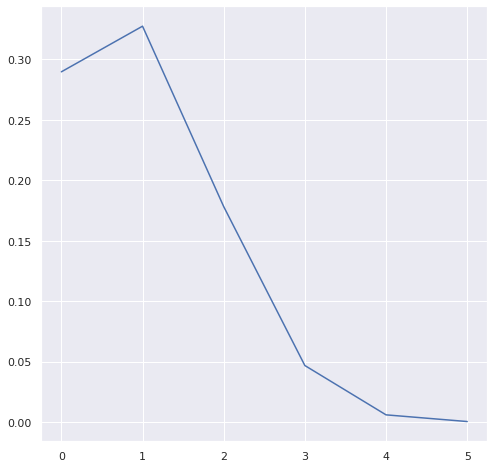

In [30]:
temp = mystery_data['feature 1'][mystery_data['feature 1']<4]

rng = np.arange(temp.max()- temp.min())
plt.plot(rng, norm.pdf(rng, temp.mean(), temp.std()))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


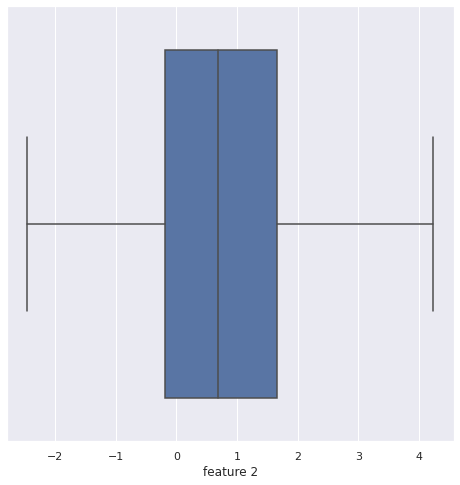

In [31]:
sns.boxplot(mystery_data['feature 2'])

In [32]:
# only one outlier in whole data set, hence we are going to remove it
df = mystery_data[mystery_data['feature 1']<4]

In [33]:
df = df.sample(frac=1).reset_index(drop=True)

In [34]:
df.head()

,feature 1,feature 2,class
0,0.895638,-0.000817,Yes
1,0.287676,-1.099840,Yes
2,-0.136396,-0.113224,Yes
3,2.053025,1.682294,No
4,-0.013077,0.330499,No


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


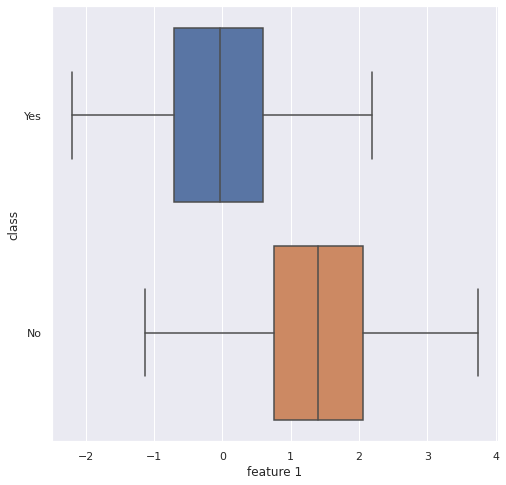

In [35]:
sns.boxplot(df['feature 1'], df['class'])

In [36]:
# extracting X and y

y = df['class']
X_m = df.drop(['class'], axis = 1)
X_m.shape

(399, 2)

In [37]:
X_m

,feature 1,feature 2
0,0.895638,-0.000817
1,0.287676,-1.099840
2,-0.136396,-0.113224
3,2.053025,1.682294
4,-0.013077,0.330499
...,...,...
394,1.890798,2.093634
395,1.520324,2.290153
396,1.472480,-0.275106
397,1.474069,0.893274


In [38]:
#normalization using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
X_norm_m = X_m.copy()
# apply standardization on numerical features
for i in X_m.columns:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_m[[i]])
    
    # transform the training data column
    X_norm_m[i] = scale.transform(X_m[[i]])
X_norm_m.head()

,feature 1,feature 2
0,0.521615,0.366461
1,0.419250,0.201953
2,0.347847,0.349635
3,0.716488,0.618399
4,0.368611,0.416054


In [39]:
y = (y!='Yes').astype(int)
y

0      0
1      0
2      0
3      1
4      1
      ..
394    1
395    1
396    0
397    1
398    0
Name: class, Length: 399, dtype: int64

In [40]:
y.value_counts().head()

0    200
1    199
Name: class, dtype: int64

In [41]:
# train-test split
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm_m,y,test_size=0.2, random_state=1)

In [42]:
y_test1.value_counts().head()

0    46
1    34
Name: class, dtype: int64

In [43]:
x_tr_m = pd.concat([X_train1, y_train1],axis=1)
x_te_m = pd.concat([X_test1, y_test1],axis=1)

In [44]:
#applying knn
knn(x_tr_m, x_te_m)

accuracy of k =  1  is  76.25
accuracy of k =  3  is  77.5
accuracy of k =  5  is  80.0
accuracy of k =  7  is  82.5
accuracy of k =  9  is  83.75
accuracy of k =  11  is  85.0
accuracy of k =  13  is  87.5


### Shooting data

In [4]:
shooting_data = pd.read_csv('/shooting.csv')
shooting_data.head()

,x cordinate,y cordinate,class
0,-0.118879,0.047248,Hit
1,0.051149,-0.080544,Hit
2,0.015521,-0.036356,Hit
3,-0.231539,0.262369,Hit
4,0.311976,-0.247568,Hit


In [5]:
shooting_data.shape

(100, 3)

In [6]:
shooting_data = shooting_data.sample(frac=1).reset_index(drop=True)
shooting_data.head()

,x cordinate,y cordinate,class
0,0.038704,-1.678348,Miss
1,-0.183792,-0.492753,Hit
2,-0.501572,-0.744186,Hit
3,0.297628,-0.317471,Hit
4,-0.039780,-0.001396,Hit


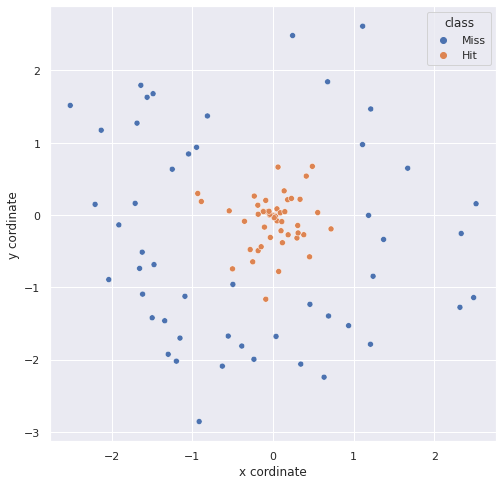

In [7]:
sns.set(rc={'figure.figsize' : (8,8)})
sns.scatterplot(x= shooting_data['x cordinate'], y=shooting_data['y cordinate'], hue= shooting_data['class'])

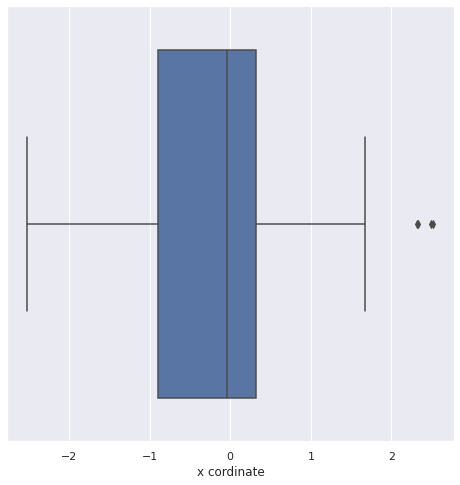

In [8]:
sns.boxplot(x= shooting_data['x cordinate'])

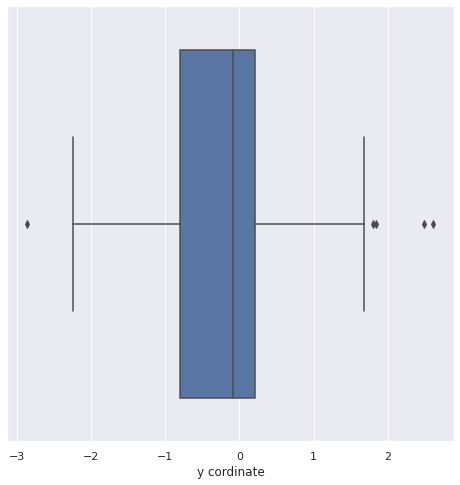

In [9]:
sns.boxplot(x= shooting_data['y cordinate'])

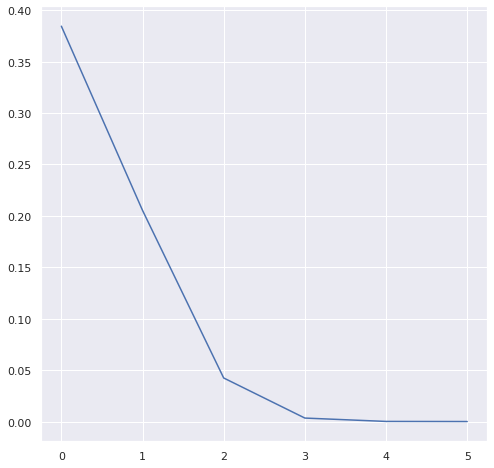

In [10]:
from scipy.stats import norm

rng = np.arange(shooting_data['x cordinate'].max() - shooting_data['x cordinate'].min())
plt.plot(rng, norm.pdf(rng, shooting_data['x cordinate'].mean(), shooting_data['x cordinate'].std()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


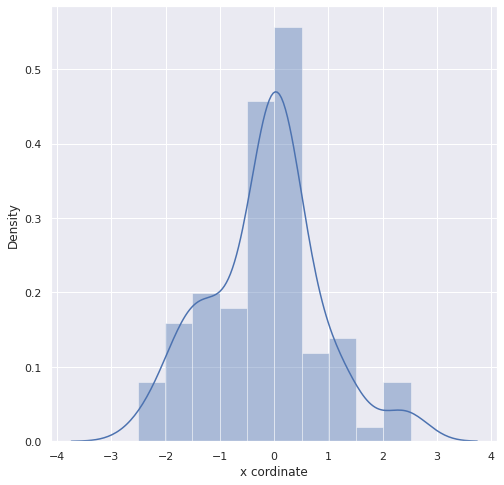

In [11]:
sns.distplot(shooting_data['x cordinate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


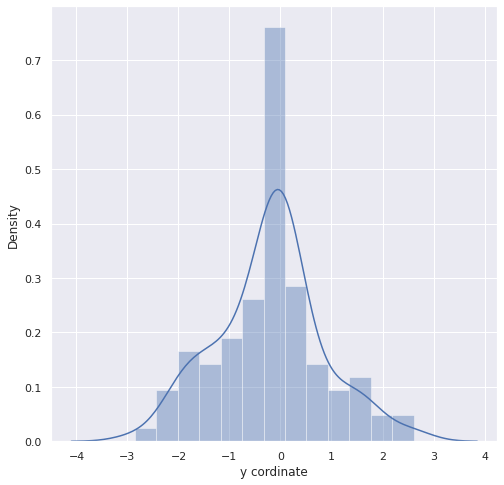

In [12]:
sns.distplot(shooting_data['y cordinate'])

In [13]:
from scipy.stats import skew

skew(shooting_data['x cordinate'])

0.1627282773370777

In [14]:
skew(shooting_data['y cordinate'])

0.1031986906659999

In [15]:
shooting_data.describe()

,x cordinate,y cordinate
count,100.000000,100.000000
mean,-0.159176,-0.212215
std,1.025198,1.041977
min,-2.513880,-2.855395
25%,-0.894997,-0.796639
50%,-0.044273,-0.083388
75%,0.318032,0.205013
max,2.518986,2.611723


In [16]:
min_threshold, max_threshold=shooting_data['x cordinate'].quantile([0.005,0.995])
min_threshold, max_threshold

(-2.36128536, 2.50423401)

In [17]:
shooting_data[shooting_data['x cordinate']<max_threshold]

,x cordinate,y cordinate,class
0,0.038704,-1.678348,Miss
1,-0.183792,-0.492753,Hit
2,-0.501572,-0.744186,Hit
3,0.297628,-0.317471,Hit
4,-0.039780,-0.001396,Hit
...,...,...,...
95,-0.037468,0.010287,Hit
96,-0.048766,0.051682,Hit
97,-1.342192,-1.461893,Miss
98,-0.105414,-0.166801,Hit


In [18]:
shooting_data[shooting_data['x cordinate']>min_threshold]

,x cordinate,y cordinate,class
0,0.038704,-1.678348,Miss
1,-0.183792,-0.492753,Hit
2,-0.501572,-0.744186,Hit
3,0.297628,-0.317471,Hit
4,-0.039780,-0.001396,Hit
...,...,...,...
95,-0.037468,0.010287,Hit
96,-0.048766,0.051682,Hit
97,-1.342192,-1.461893,Miss
98,-0.105414,-0.166801,Hit


In [19]:
min_threshold, max_threshold=shooting_data['y cordinate'].quantile([0.005,0.995])
min_threshold, max_threshold

(-2.5517847700000003, 2.547621489999999)

In [20]:
shooting_data[shooting_data['y cordinate']<max_threshold]

,x cordinate,y cordinate,class
0,0.038704,-1.678348,Miss
1,-0.183792,-0.492753,Hit
2,-0.501572,-0.744186,Hit
3,0.297628,-0.317471,Hit
4,-0.039780,-0.001396,Hit
...,...,...,...
95,-0.037468,0.010287,Hit
96,-0.048766,0.051682,Hit
97,-1.342192,-1.461893,Miss
98,-0.105414,-0.166801,Hit


In [21]:
shooting_data[shooting_data['y cordinate']>min_threshold]

,x cordinate,y cordinate,class
0,0.038704,-1.678348,Miss
1,-0.183792,-0.492753,Hit
2,-0.501572,-0.744186,Hit
3,0.297628,-0.317471,Hit
4,-0.039780,-0.001396,Hit
...,...,...,...
95,-0.037468,0.010287,Hit
96,-0.048766,0.051682,Hit
97,-1.342192,-1.461893,Miss
98,-0.105414,-0.166801,Hit


In [22]:
# Winsorization

from scipy.stats.mstats import winsorize

winsorize(shooting_data['x cordinate'], limits=[0.05, 0.05])
winsorize(shooting_data['y cordinate'], limits=[0.05, 0.05])

masked_array(data=[-1.678348e+00, -4.927530e-01, -7.441860e-01,
                   -3.174710e-01, -1.396000e-03,  5.154100e-02,
                    1.628592e+00,  2.179060e-01,  3.342810e-01,
                   -1.811314e+00,  1.619240e-01, -8.461890e-01,
                   -1.925256e+00,  2.026600e-01, -2.546460e-01,
                   -1.093669e+00, -1.360590e-01, -2.720540e-01,
                   -7.376840e-01, -1.123523e+00, -1.994404e+00,
                    6.338020e-01, -1.673425e+00, -5.925000e-03,
                   -8.623100e-02,  1.370241e+00,  2.623690e-01,
                   -5.130900e-01, -4.769110e-01, -2.596000e-03,
                    1.565180e-01, -4.118000e-03,  3.468200e-02,
                   -1.529416e+00,  1.478740e-01, -1.908600e-02,
                    1.628592e+00, -2.172100e-01, -7.801220e-01,
                   -8.922810e-01, -1.994404e+00, -1.994404e+00,
                    1.628592e+00, -1.443130e-01, -5.777270e-01,
                    5.818700e-02,  1.875

In [23]:
# extracting X and y

y_s = shooting_data['class']
X_s = shooting_data.drop(['class'], axis = 1)
X_s.shape

(100, 2)

In [24]:
X_s.head()

,x cordinate,y cordinate
0,0.038704,-1.678348
1,-0.183792,-0.492753
2,-0.501572,-0.744186
3,0.297628,-0.317471
4,-0.039780,-0.001396


In [45]:
#normalization using MinMaxScaler

X_norm_s = X_s.copy()
# apply standardization on numerical features
for i in X_s.columns:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_s[[i]])
    
    # transform the training data column
    X_norm_s[i] = scale.transform(X_s[[i]])
X_norm_s.head()

,x cordinate,y cordinate
0,0.507183,0.215296
1,0.462974,0.432155
2,0.399833,0.386165
3,0.558630,0.464216
4,0.491589,0.522030


In [46]:
y_s = (y_s!='Hit').astype(int)
y_s

0     1
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    1
98    0
99    0
Name: class, Length: 100, dtype: int64

In [47]:
y_s.value_counts().head()

1    50
0    50
Name: class, dtype: int64

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_norm_s,y_s,test_size=0.2, random_state=1)

In [49]:
y_train2.value_counts().head()

0    42
1    38
Name: class, dtype: int64

In [50]:
x_tr_s = pd.concat([X_train2, y_train2],axis=1)
x_te_s = pd.concat([X_test2, y_test2],axis=1)

#applying knn

knn(x_tr_s, x_te_s)

accuracy of k =  1  is  100.0
accuracy of k =  3  is  100.0
accuracy of k =  5  is  95.0
accuracy of k =  7  is  95.0
accuracy of k =  9  is  95.0
accuracy of k =  11  is  80.0
accuracy of k =  13  is  80.0


#Perceptron Learning algorithm 

In [1]:
def weights(X_in):
    b=np.ones((X_in.shape[0],1)) #adding one column in X_input vector 
    X_in['b'] = b
    W = np.zeros(X_in.shape[1])# weight vector has similar size of X_input
    new_X = np.array(X_in)
    return new_X, W

def perceptron(new_X, W, y):
    while True:
        missClassification = 0
        for x in range(len(new_X)):
            result = W.T.dot(new_X[x])
            #activation = 1.0 if result > 0.0 else 0.0
           
            if y[x]*result<=0:
              W = W + y[x]*(new_X[x])
              missClassification +=1
              plt.plot(W*new_X[x])
              plt.show
              print('missclassified')
              input("Press Enter to continue...")
                
        if missClassification==0:
            break
    return W

### Mystery data

missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified


KeyboardInterrupt: ignored

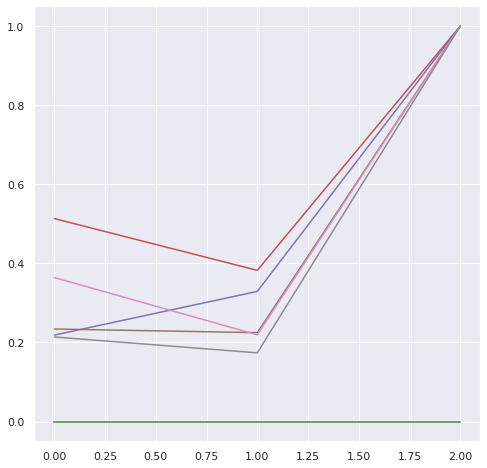

In [64]:
new_X_m, W_m = weights(X_norm_m)
perceptron(new_X_m, W_m, y)

### Shooting data

missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
Press Enter to continue...
missclassified
missclassified
Press Enter to continue...
missclassified
Press Enter to continue...
missclassified


KeyboardInterrupt: ignored

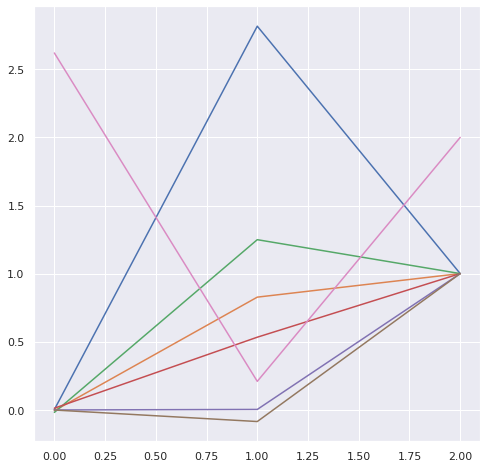

In [65]:
new_X_s, W_s = weights(X_s)
perceptron(new_X_s, W_s, y_s)